![title](images/Header.png)

## Portfolio Combustivel Automotivo 1 Semestre 2023


Dataset links:

Data License on:
https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


C:\Users\Ferreira\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Silenciar Warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

In [5]:
# Carregando os dados
dados = pd.read_csv("CombustivelAutomotivo_2023.01.csv", delimiter=';')

In [6]:
dados.shape

(431576, 16)

In [7]:
dados.head(10)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,"3,39",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,"6,21",NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,"4,39",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,"3,89",NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,"6,49",NaN,R$ / litro,VIBRA ENERGIA
5,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,02/01/2023,"5,14",NaN,R$ / litro,VIBRA ENERGIA
6,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,02/01/2023,"5,14",NaN,R$ / litro,VIBRA ENERGIA
7,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,ETANOL,02/01/2023,"3,79",NaN,R$ / litro,VIBRA ENERGIA
8,NE,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,02/01/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
9,NE,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,KM 70,CANAFISTULA,57302-802,ETANOL,02/01/2023,"4,19",NaN,R$ / litro,IPIRANGA


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431576 entries, 0 to 431575
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     431576 non-null  object 
 1   Estado - Sigla     431576 non-null  object 
 2   Municipio          431576 non-null  object 
 3   Revenda            431576 non-null  object 
 4   CNPJ da Revenda    431576 non-null  object 
 5   Nome da Rua        431576 non-null  object 
 6   Numero Rua         431469 non-null  object 
 7   Complemento        98576 non-null   object 
 8   Bairro             430748 non-null  object 
 9   Cep                431576 non-null  object 
 10  Produto            431576 non-null  object 
 11  Data da Coleta     431576 non-null  object 
 12  Valor de Venda     431576 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  431576 non-null  object 
 15  Bandeira           431576 non-null  object 
dtypes:

In [9]:
dadosDup = dados.duplicated()
dadosDup.describe()

count     431576
unique         1
top        False
freq      431576
dtype: object

In [10]:
# Verificando as linhas duplicadas
LinesDup = dados[dados.duplicated()]
LinesDup.sum()

Regiao - Sigla       0.0
Estado - Sigla       0.0
Municipio            0.0
Revenda              0.0
CNPJ da Revenda      0.0
Nome da Rua          0.0
Numero Rua           0.0
Complemento          0.0
Bairro               0.0
Cep                  0.0
Produto              0.0
Data da Coleta       0.0
Valor de Venda       0.0
Valor de Compra      0.0
Unidade de Medida    0.0
Bandeira             0.0
dtype: float64

In [11]:
# Renomeando as colunas
dados.rename(columns = {'Regiao - Sigla': 'Regiao',
                        'Estado - Sigla': 'Estado',
                        'CNPJ da Revenda': 'CNPJRevenda',
                        'Nome da Rua': 'NomeRua',
                        'Numero Rua': 'NumeroRua',
                        'Data da Coleta': 'DataColeta',
                        'Valor de Venda': 'ValorVenda',
                        'Valor de Compra': 'ValorCompra',
                        'Unidade de Medida': 'UnidadeMedida',
                       }, inplace = True)

In [12]:
dados.columns

Index(['Regiao', 'Estado', 'Municipio', 'Revenda', 'CNPJRevenda', 'NomeRua',
       'NumeroRua', 'Complemento', 'Bairro', 'Cep', 'Produto', 'DataColeta',
       'ValorVenda', 'ValorCompra', 'UnidadeMedida', 'Bandeira'],
      dtype='object')

In [13]:
# Alterando o tipo de 'ValorVenda' para float64:

#dados["ValorVenda"] = dados["ValorVenda"].astype("float64")

In [14]:
dados

,Regiao,Estado,Municipio,Revenda,CNPJRevenda,NomeRua,NumeroRua,Complemento,Bairro,Cep,Produto,DataColeta,ValorVenda,ValorCompra,UnidadeMedida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,"3,39",NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,"6,21",NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,"4,39",NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,"3,89",NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,"6,49",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431571,S,RS,LAJEADO,SIM REDE DE POSTOS LTDA,07.473.735/0187-14,RODOVIA ERS-130,2285,KM 72.8,SANTO ANDRE,95912-000,GNV,26/06/2023,"5,79",NaN,R$ / m³,CHARRUA
431572,S,RS,LAJEADO,SIM REDE DE POSTOS LTDA,07.473.735/0188-03,AVENIDA BENJAMIN CONSTANT,2324,NaN,FLORESTAL,95900-702,ETANOL,26/06/2023,"4,68",NaN,R$ / litro,CHARRUA
431573,S,RS,LAJEADO,SIM REDE DE POSTOS LTDA,07.473.735/0188-03,AVENIDA BENJAMIN CONSTANT,2324,NaN,FLORESTAL,95900-702,DIESEL S10,26/06/2023,"4,68",NaN,R$ / litro,CHARRUA
431574,S,RS,LAJEADO,SIM REDE DE POSTOS LTDA,07.473.735/0188-03,AVENIDA BENJAMIN CONSTANT,2324,NaN,FLORESTAL,95900-702,GASOLINA ADITIVADA,26/06/2023,"5,39",NaN,R$ / litro,CHARRUA


In [15]:
listadados = dados['ValorVenda']
listadados = list(listadados)

In [16]:
listadadosnum = []
for word in listadados:
    word = word.replace(',','.')
    listadadosnum.append(word)

In [17]:
listadadosnum

['3.39',
 '6.21',
 '4.39',
 '3.89',
 '6.49',
 '5.14',
 '5.14',
 '3.79',
 '5.29',
 '4.19',
 '6.89',
 '5.39',
 '5.19',
 '4.89',
 '4.49',
 '6.99',
 '5.99',
 '5.79',
 '8.38',
 '5.99',
 '5.99',
 '7.5',
 '6',
 '5.99',
 '4.44',
 '6.52',
 '4.77',
 '4.44',
 '4.44',
 '6.55',
 '6.26',
 '4.79',
 '4.59',
 '6.42',
 '6.25',
 '4.44',
 '4.44',
 '7.59',
 '7.33',
 '4.67',
 '4.3',
 '6.94',
 '6.84',
 '5.84',
 '4.3',
 '6.94',
 '6.84',
 '5.84',
 '4.99',
 '6.99',
 '6.29',
 '5.99',
 '4.97',
 '6.97',
 '5.97',
 '5.97',
 '4.99',
 '6.99',
 '6.96',
 '5.99',
 '5.99',
 '4.97',
 '6.99',
 '5.97',
 '5.97',
 '4.99',
 '6.99',
 '5.99',
 '5.99',
 '4.85',
 '6.56',
 '6.4',
 '5.65',
 '5.64',
 '4.86',
 '6.85',
 '5.66',
 '5.66',
 '4.94',
 '6.99',
 '6.16',
 '5.94',
 '4.94',
 '6.54',
 '6.54',
 '5.94',
 '4.96',
 '6.65',
 '6.59',
 '6.1',
 '5.95',
 '4.49',
 '6.4',
 '5.6',
 '4.49',
 '6.5',
 '6.4',
 '5.6',
 '4.5',
 '6.6',
 '5.6',
 '4.47',
 '6.89',
 '6.89',
 '4.49',
 '5.69',
 '5.49',
 '4.49',
 '6.49',
 '5.79',
 '5.49',
 '4.18',
 '4.49',

In [18]:
dados["ValorVenda"] = listadadosnum

In [19]:
dados.head()

,Regiao,Estado,Municipio,Revenda,CNPJRevenda,NomeRua,NumeroRua,Complemento,Bairro,Cep,Produto,DataColeta,ValorVenda,ValorCompra,UnidadeMedida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,3.39,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,6.21,NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,4.39,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,3.89,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,6.49,NaN,R$ / litro,VIBRA ENERGIA


In [20]:
dados["ValorVenda"] = dados["ValorVenda"].astype("float64")

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431576 entries, 0 to 431575
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Regiao         431576 non-null  object 
 1   Estado         431576 non-null  object 
 2   Municipio      431576 non-null  object 
 3   Revenda        431576 non-null  object 
 4   CNPJRevenda    431576 non-null  object 
 5   NomeRua        431576 non-null  object 
 6   NumeroRua      431469 non-null  object 
 7   Complemento    98576 non-null   object 
 8   Bairro         430748 non-null  object 
 9   Cep            431576 non-null  object 
 10  Produto        431576 non-null  object 
 11  DataColeta     431576 non-null  object 
 12  ValorVenda     431576 non-null  float64
 13  ValorCompra    0 non-null       float64
 14  UnidadeMedida  431576 non-null  object 
 15  Bandeira       431576 non-null  object 
dtypes: float64(2), object(14)
memory usage: 52.7+ MB


In [22]:
# Criando uma cópia do dataframe
df = dados.copy()

In [23]:
dfbackup = dados.copy()

### Trabalhando com a análise para o Produto GASOLINA:


In [24]:
# Trabalhando com a análise para o Produto GASOLINA:
df = df[df['Produto'] == 'GASOLINA']

In [25]:
df['Produto'].value_counts()

GASOLINA    110824
Name: Produto, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110824 entries, 2 to 431575
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Regiao         110824 non-null  object 
 1   Estado         110824 non-null  object 
 2   Municipio      110824 non-null  object 
 3   Revenda        110824 non-null  object 
 4   CNPJRevenda    110824 non-null  object 
 5   NomeRua        110824 non-null  object 
 6   NumeroRua      110797 non-null  object 
 7   Complemento    24695 non-null   object 
 8   Bairro         110589 non-null  object 
 9   Cep            110824 non-null  object 
 10  Produto        110824 non-null  object 
 11  DataColeta     110824 non-null  object 
 12  ValorVenda     110824 non-null  float64
 13  ValorCompra    0 non-null       float64
 14  UnidadeMedida  110824 non-null  object 
 15  Bandeira       110824 non-null  object 
dtypes: float64(2), object(14)
memory usage: 14.4+ MB


# Variáveis Categóricas:

In [27]:
# Descrevendo as variáveis categóricas
df.describe(include = object)

,Regiao,Estado,Municipio,Revenda,CNPJRevenda,NomeRua,NumeroRua,Complemento,Bairro,Cep,Produto,DataColeta,UnidadeMedida,Bandeira
count,110824,110824,110824,110824,110824,110824,110797,24695,110589,110824,110824,110824,110824,110824
unique,5,27,460,7707,8748,5762,3328,1562,4048,6716,1,129,1,46
top,SE,SP,SAO PAULO,SIM REDE DE POSTOS LTDA,30.360.117/0001-47,AVENIDA BRASIL,S/N,0,CENTRO,68515-000,GASOLINA,11/04/2023,R$ / litro,BRANCA
freq,53663,30894,5087,899,26,1157,9832,1152,18858,304,110824,1535,110824,37773


In [28]:
##### Interessante análise com as varíaveis categóricas:
#### Regiao  --  Estado  --  Produto  --  Bandeira  --  UnidadeMedida
###
##
#

In [29]:
df.Produto.value_counts()

GASOLINA    110824
Name: Produto, dtype: int64

# Variável Data Coleta:

In [30]:
df.DataColeta

2         03/01/2023
6         02/01/2023
8         02/01/2023
12        02/01/2023
17        02/01/2023
             ...    
431556    29/06/2023
431561    29/06/2023
431565    28/06/2023
431570    26/06/2023
431575    26/06/2023
Name: DataColeta, Length: 110824, dtype: object

In [31]:
#Formatando a varíavel DataColeta para Date:
df["DataColeta"] = pd.to_datetime(df["DataColeta"])

In [32]:
# Extraindo o mês
df["Mes"] = df["DataColeta"].dt.month
df.Mes

2         3
6         2
8         2
12        2
17        2
         ..
431556    6
431561    6
431565    6
431570    6
431575    6
Name: Mes, Length: 110824, dtype: int64

In [33]:
# Agrupando os dados com - .aggregate():
grouped_data_Mes = df.groupby(["Mes"])["ValorVenda"].aggregate("mean")#.reset_index()
grouped_data_Mes

Mes
1     5.090905
2     5.159825
3     5.479038
4     5.487363
5     5.341404
6     5.382510
7     5.384398
8     5.398375
9     5.306448
10    5.357558
11    5.376506
12    5.370686
Name: ValorVenda, dtype: float64

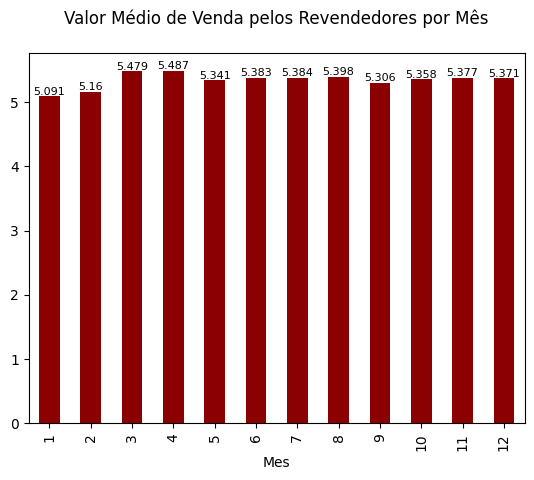

In [34]:
# Seaborn Plot
ax = round(grouped_data_Mes, 3).sort_index(ascending=True).plot(kind='bar', color="darkred")

for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.title("Valor Médio de Venda pelos Revendedores por Mês\n")
plt.show()

In [35]:
QtdeConsultasMes = df.Mes.value_counts()
print(QtdeConsultasMes)

6     17015
3     16793
5     16320
2     14094
1     13686
4     12290
8      3847
9      3736
7      3497
10     3473
11     3128
12     2945
Name: Mes, dtype: int64


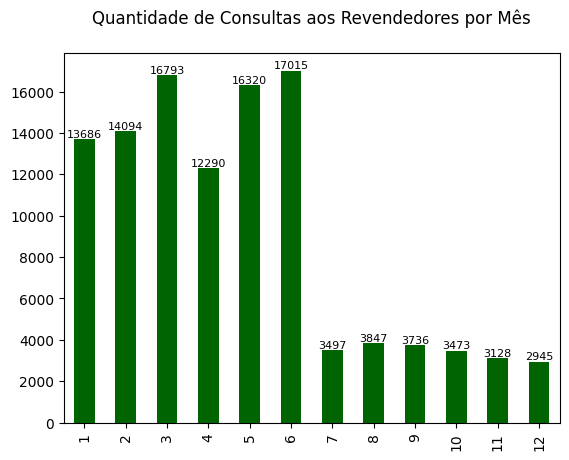

In [36]:
# Seaborn Plot
ax = QtdeConsultasMes.sort_index(ascending=True).plot(kind='bar', color="darkgreen")

for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.title("Quantidade de Consultas aos Revendedores por Mês\n")
plt.show()

In [37]:
# Agrupando os dados:
grouped_data_dia = df.groupby(["DataColeta"])["ValorVenda"].aggregate("mean").reset_index()
grouped_data_dia.head(8)

,DataColeta,ValorVenda
0,2023-01-02,5.150858
1,2023-01-03,5.407843
2,2023-01-05,5.486517
3,2023-01-06,5.200629
4,2023-01-13,4.890000
5,2023-01-16,4.986204
6,2023-01-17,4.986048
7,2023-01-18,5.011875


In [38]:
marco = (grouped_data_dia['DataColeta'] >= '2023-03-01') & (grouped_data_dia['DataColeta'] <= '2023-03-31')

In [39]:
grouped_data_dia_marco = grouped_data_dia[marco]
grouped_data_dia_marco

,DataColeta,ValorVenda
33,2023-03-01,5.098950
34,2023-03-02,5.472000
35,2023-03-03,5.609783
36,2023-03-04,5.448943
37,2023-03-05,5.553485
38,2023-03-13,5.514128
39,2023-03-14,5.544685
40,2023-03-15,5.545324
41,2023-03-16,5.522749
42,2023-03-17,5.694545


In [40]:
grouped_data_dia_marco['DataColeta'] = grouped_data_dia_marco['DataColeta'].dt.day
grouped_data_dia_marco.reset_index(drop = True)

,DataColeta,ValorVenda
0,1,5.098950
1,2,5.472000
2,3,5.609783
3,4,5.448943
4,5,5.553485
5,13,5.514128
6,14,5.544685
7,15,5.545324
8,16,5.522749
9,17,5.694545


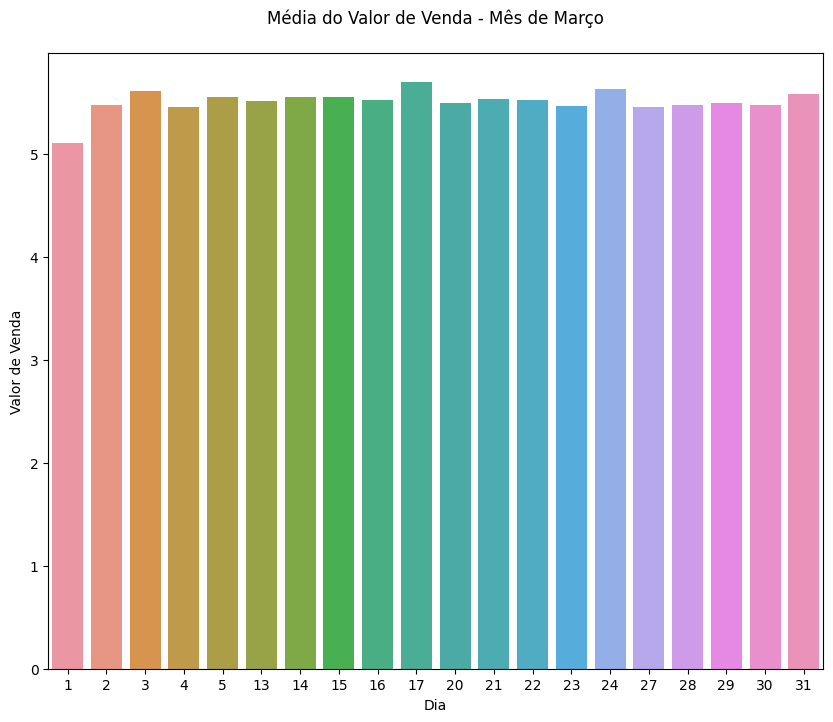

In [41]:
# Seaborn Plot3
plt.figure(figsize=(10, 8))

ax = sns.barplot(x='DataColeta', y='ValorVenda', data=grouped_data_dia_marco)


ax.set_xlabel('Dia')
ax.set_ylabel('Valor de Venda')
ax.set_title("Média do Valor de Venda - Mês de Março\n")

plt.show()

# Variável Regiao

In [42]:
# Média Valor de Venda por Região:
MediaRegiao = df.groupby(["Regiao"])["ValorVenda"].aggregate("mean").reset_index()
MediaRegiao.head(12)

,Regiao,ValorVenda
0,CO,5.296104
1,N,5.629214
2,NE,5.451646
3,S,5.353561
4,SE,5.244099


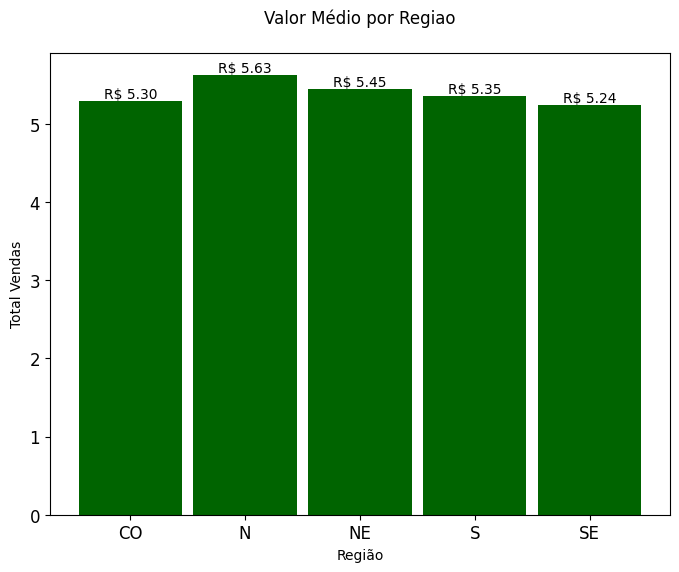

In [43]:
# Plot
ax = MediaRegiao.plot(kind="bar", 
                      x='Regiao', y='ValorVenda', 
                      color="darkgreen", 
                      figsize=(8,6), 
                      width = 0.9,
                      legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='R$ %.2f', fontsize=10)

plt.title("Valor Médio por Regiao\n")
plt.xlabel("Região")
plt.ylabel("Total Vendas")

ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.show()

Os valores médios mais altos são praticados na Região Norte

In [44]:
QtdeConsultasRegiao = df.Regiao.value_counts()
QtdeConsultasRegiao

SE    53663
NE    20960
S     19589
CO     8406
N      8206
Name: Regiao, dtype: int64

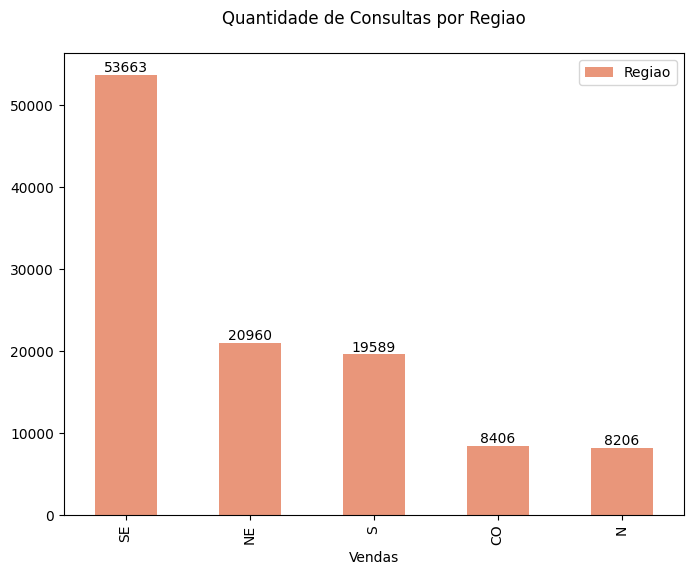

In [45]:
# Plot
ax = df.Regiao.value_counts().plot(kind = "bar", 
                                   color= "darksalmon",
                                   figsize = (8,6))

for container in ax.containers:
    ax.bar_label(container)

plt.title("Quantidade de Consultas por Regiao\n")
plt.xlabel("Região")
plt.xlabel("Vendas")
plt.legend()
plt.show()

Os dados demonstram que os maiores volumes das consultas foram praticadas na região Sudeste, provavelmente pelo maior índice demográfico brasileiro e a uma concentração de postos de combustíveis

# Variável Estado

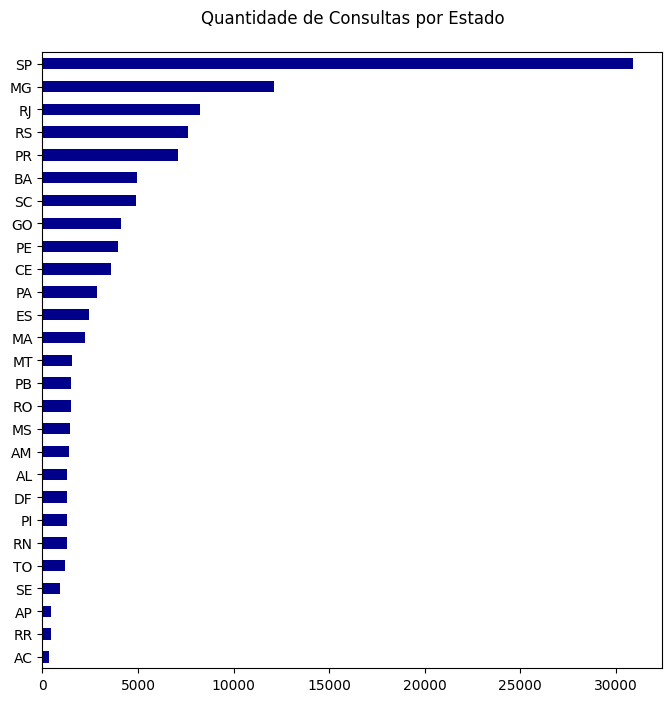

In [46]:
# Bar Plot
df.Estado.value_counts(ascending=True).plot(kind = "barh", color= "darkblue",figsize = (8,8))
plt.title("Quantidade de Consultas por Estado\n")
#plt.legend()
plt.show()

* Confirmação de que a grande maioria de revendas consultadas nos postos foi para Regiao Sudeste.
Sendo as três maiores São Paulo, Minas Gerais e Rio de Janeiro, respectivamente.

In [47]:
# Média Valor de Venda por Estado:
MediaEstado = df.groupby(["Estado"])["ValorVenda"].aggregate("mean").reset_index()
MediaEstado.head(12)

,Estado,ValorVenda
0,AC,5.851717
1,AL,5.583248
2,AM,6.101599
3,AP,4.960364
4,BA,5.624446
5,CE,5.688475
6,DF,5.309345
7,ES,5.453351
8,GO,5.311756
9,MA,5.253414


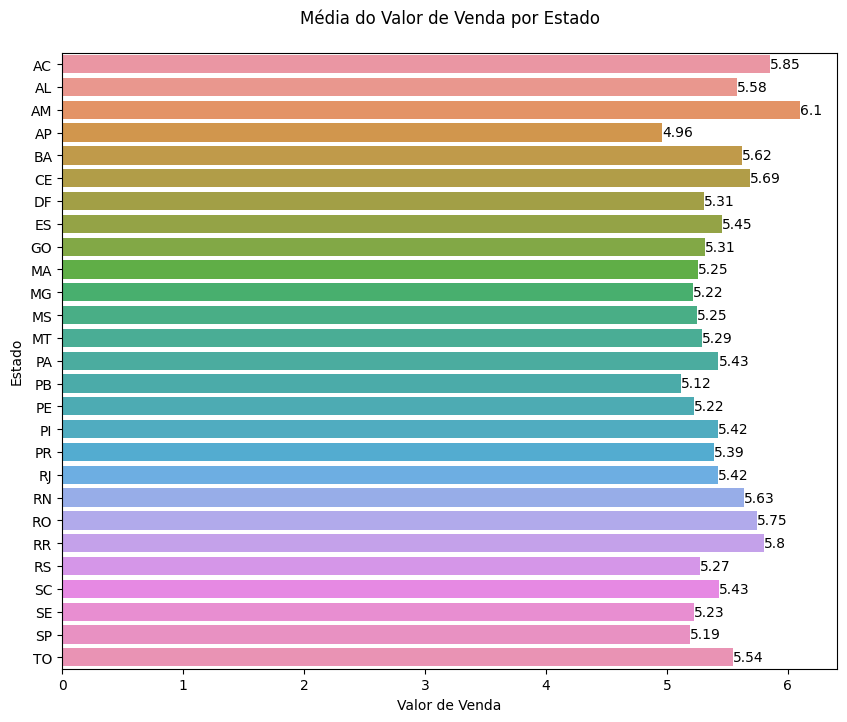

In [48]:
# Seaborn Plot3
plt.figure(figsize=(10, 8))

ax = sns.barplot(x='ValorVenda', y='Estado', data=MediaEstado)


ax.set_xlabel('Valor de Venda')
ax.set_ylabel('Estado')
ax.set_title("Média do Valor de Venda por Estado\n")

for index, value in enumerate(MediaEstado['ValorVenda']):
    ax.text(value, index, str(round(value, 2)), color='black', va='center')

plt.show()

+ Como Podemos acompanhar os maiores valores de média de venda(por litro) aplicado pelas revendas por estado foram em:
1. 6,10 - Amazonas
2. 5,85 - Acre
3. 5,80 - Roraima
4. 5,75 - Rondonia
5. 5,69 - Ceará
 
   Lembrando que redominantemente a região Norte do Brasil demonstrou trabalhar com os mais altos valores de venda por litro de Gasolina. 

# Variável Produto:

In [49]:
TotalProduto = df.Produto.value_counts()
TotalProduto

GASOLINA    110824
Name: Produto, dtype: int64

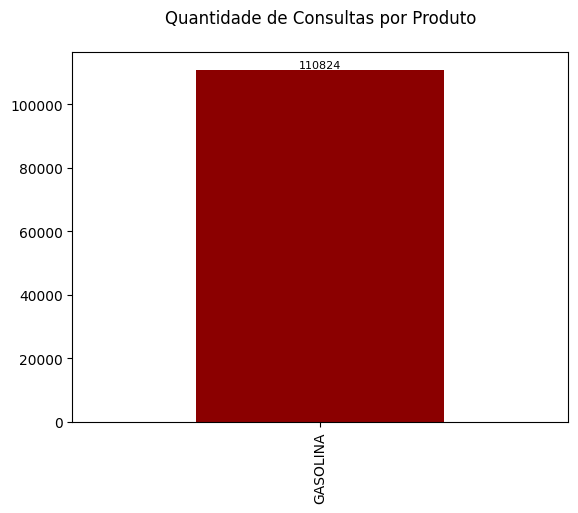

In [50]:
# Seaborn Plot
ax = TotalProduto.plot(kind='bar', color="darkred")

for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.title("Quantidade de Consultas por Produto\n")
plt.show()

# Variável Valor de Venda

In [51]:
df.ValorVenda.describe()

count    110824.000000
mean          5.335161
std           0.395340
min           4.090000
25%           4.990000
50%           5.290000
75%           5.590000
max           8.190000
Name: ValorVenda, dtype: float64

* Acima a média de preço no país - 5,335161 reais

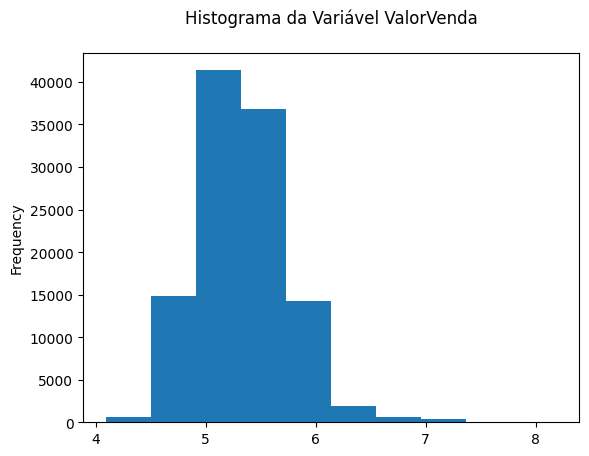

In [52]:
# Histograma
df.ValorVenda.plot(kind = "hist")
plt.title("Histograma da Variável ValorVenda\n")
plt.show()

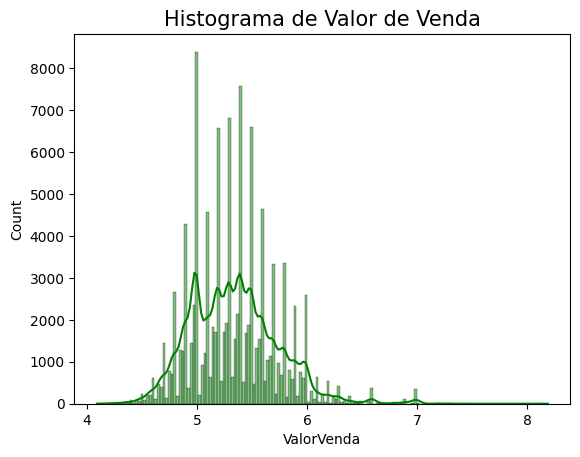

In [53]:
# Histograma Seaborn
sns.histplot(df["ValorVenda"], kde=True, color="green")
plt.title("Histograma de Valor de Venda", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Boxplot da Variável Valor de Venda')

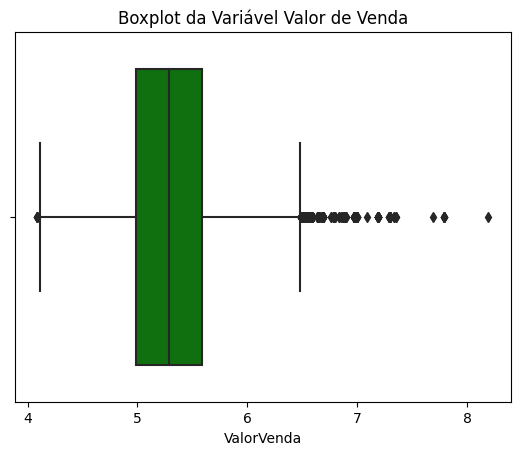

In [54]:
# Boxplot da Variável BoxPlot 
sns.boxplot(df['ValorVenda'], color = "green")
plt.title("Boxplot da Variável Valor de Venda")

![title](images/BoxPlot.png)

In [55]:
# Teste de Normalidade da Distribuição

# Lista com a variável numérica
numerical_feature = ['ValorVenda']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade com a função normaltest de (scipi.stats) aplicando teste de hipótese
    # Retornando a estatística e valor-p
    stats, pval = normaltest(df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

ValorVenda : Distribuição Não Normal



* Grande maioria dos valores se concentram entre 5,00 e 5,60 reais o litro

* Conseguimos verificar que há variáveis outliers, que demonstram uma grande disparidade no preço de venda praticado do litro da gasolina

* Portanto essa variável não segue uma distribuição normal


# Variável Bandeira

In [70]:
ValorMedioBandeira = dados.groupby(["Bandeira"])["ValorVenda"].mean()
ValorMedioBandeira

Bandeira
AIR BP                  5.548800
ALESAT                  5.244640
AMERICANOIL             5.371600
ATEM' S                 5.697395
ATLÂNTICA               5.404869
BRANCA                  5.098157
CHARRUA                 5.409447
CIAPETRO                5.100472
DIBRAPE                 5.351774
DISLUB                  5.186374
D`MAIS                  4.977292
EQUADOR                 5.996507
ESTRADA                 5.213143
FAN                     5.319194
FEDERAL ENERGIA         4.861486
IDAZA                   5.294984
IPIRANGA                5.299912
LARCO                   5.081330
MASUT DISTRIBUIDORA     5.131239
MAXSUL                  5.375858
ON PETRO                5.227500
PELIKANO                5.193421
PETROBAHIA              5.169789
PETROBRASIL             4.704337
PETROX DISTRIBUIDORA    5.135328
POTENCIAL               5.433318
RAIZEN                  5.187466
RAIZEN MIME             5.525546
REJAILE                 5.547619
RIO BRANCO              5.144849
R

   Calculando a média por Bandeira acima da média nacional

In [74]:

TopMediaBandeira = ValorMedioBandeira[ValorMedioBandeira > 5.335161]
TopMediaBandeira.sort_values(ascending=False)

Bandeira
EQUADOR             5.996507
ATEM' S             5.697395
SABBÁ               5.570760
AIR BP              5.548800
REJAILE             5.547619
SP                  5.526748
RAIZEN MIME         5.525546
WALENDOWSKY         5.508679
SUL COMBUSTÍVEIS    5.477931
RODOIL              5.464722
POTENCIAL           5.433318
SIMARELLI           5.424194
CHARRUA             5.409447
ATLÂNTICA           5.404869
MAXSUL              5.375858
AMERICANOIL         5.371600
DIBRAPE             5.351774
Name: ValorVenda, dtype: float64

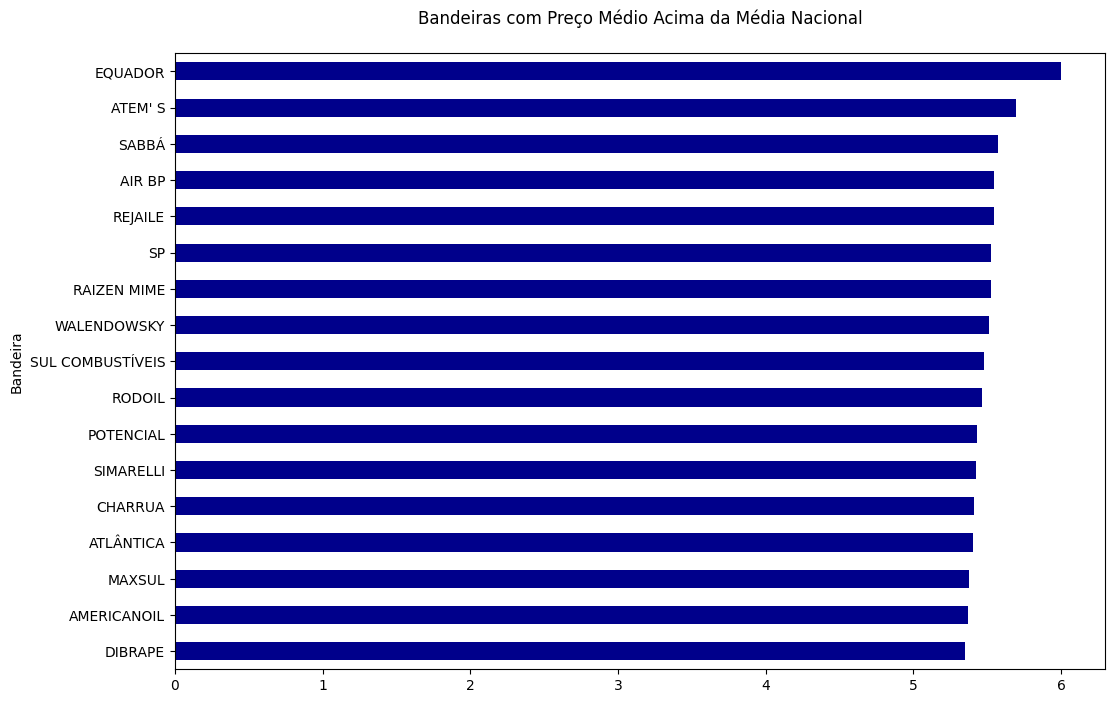

In [72]:
# Bar Plot
TopMediaBandeira.sort_values(ascending=True).plot(kind = "barh", color= "darkblue",figsize = (12,8))
plt.title("Bandeiras com Preço Médio Acima da Média Nacional\n")
#plt.legend()
plt.show()

### Salvando arquivo alterado em CSV:

In [64]:
df.to_csv('./CombustivelAutomotivo_2023.01_v1.csv', index=False)

## Atividades

* Nesse trabalho não haviam linhas ou colunas duplicadas.
   
* Foram feitas alterações: 
   * Nos labels das colunas. 
   * Alterado tipo de dado na coluna 'ValorVenda' para 'float64'.
   * Alterado tipo de dado na coluna 'DataColeta' para 'datetime64'. 
   * Exportado com alteraçoes versão1 em .csv.


## Conclusão

* Inicialmente tomado decisão em analisar principalmente as variáveis categóricas: 
   Regiao, Estado, Produto, Bandeira, UnidadeMedida. 
   
* A análise ficou concentrada em alterações de preço sobre essas variáveis. 

* E somente sobre o Produto Gasolina. 

* Observamos o dataset com relação na análise sobre as alterações de média de Valor de Venda pelas Revendas no período de coleta dos dados em 2023. 
 
Foram 110.824 consultas totais feitas nas revendas de postos para o produto Gasolina
   Conforme o dataset a concentração da apuração de consultas teve seu foco no primeiro semestre de 2023, e deste variando de 12.290 a 17.015 consultas por mês. 
   
   O preço médio do valor praticado ao mês não demonstra diferenças significativas, apenas uma leve alta a partir do mês de março e abril. 
      Analisando o mês de março notamos que o aumento se inicia a partir do dia 2
   
   Os valores médios mais altos são praticados na Região Norte, considerando também que ali houve a menor contagem de consultas.
 
   Os dados demonstram que os maiores volumes das consultas foram praticadas na região Sudeste (53.663), provavelmente pelo maior índice demográfico brasileiro e a uma concentração de postos de combustíveis.  
 
   São Paulo, Minas Gerais e Rio de Janeiro foram os maiores consultados.

> Como Podemos acompanhar os maiores valores de média de venda(por litro) aplicado pelas revendas por estado foram em:
> 1. 6,10 - Amazonas
> 2. 5,85 - Acre
> 3. 5,80 - Roraima
> 4. 5,75 - Rondonia
> 5. 5,69 - Ceará. 
>      
>      Lembrando que redominantemente a região Norte do Brasil demonstrou trabalhar com os mais altos valores de venda por litro de Gasolina. 
      E Também considerando a média de preço no país no período que foi de 5,33 reais. 
   
Analisando também o preço praticado no país notamos: 
   * Grande maioria dos valores se concentram entre 5,00 e 5,60 reais o litro. 
 
   * Conseguimos verificar que há variáveis outliers, que demonstram uma grande disparidade no preço de venda praticado do litro da gasolina, chegando a uma máximo de 8,19. 
 
   * Portanto essa variável não segue uma distribuição normal. 

Analisando as Bandeiras dos postos observamos que estas foram as que praticaram um preço acima da média nacional:
   1. EQUADOR -            5.996507
   2. ATEM' S -            5.697395
   3. SABBÁ -              5.570760
   4. AIR BP -             5.548800
   5. REJAILE -            5.547619
 
### Minhas Considerações:
* Trabalhei nesse dataset pois considerei muito interessante a série com possibilidade de trabalhar num cenário muito comum para nós.
* Me proponho a revisitar daqui seis meses e refazê-lo aplicando machine learning
   
   

